<a href="https://colab.research.google.com/github/priyarameshd/SVM/blob/main/SVM_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import seaborn as sns

In [ ]:
filename = '/content/mushroom.csv'

df_mushroom = pd.read_csv(filename)


### EDA

In [ ]:
df_mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [ ]:
df_mushroom.head(2)

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319


In [ ]:
df_mushroom.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [ ]:
df_mushroom.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [ ]:
col_names_categ = df_mushroom.columns
label_encoder = preprocessing.LabelEncoder()
for colname in col_names_categ:
    df_mushroom[colname] = label_encoder.fit_transform(df_mushroom[colname])

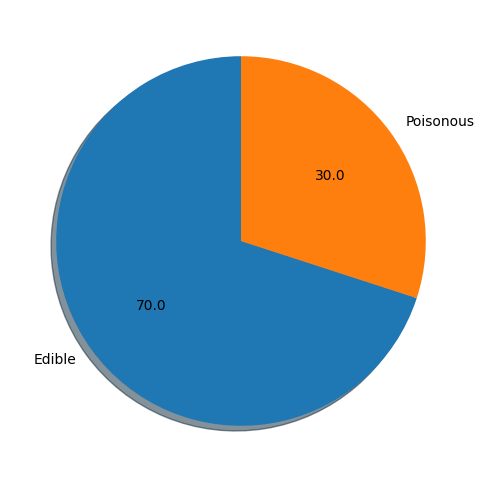

In [75]:

plt.figure(figsize = (6,6))
plt.pie(df_mushroom['class'].value_counts(), startangle = 90, autopct = '%.1f', labels = ['Edible', 'Poisonous'], shadow = True)
plt.show()

In [ ]:
X = df_mushroom.drop(columns='class')
Y = df_mushroom['class']

In [ ]:
Y.unique()

array([1, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3,random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1400, 25), (1400,), (600, 25), (600,))

### SVM classiffier and Hyperparameter Tuning

In [ ]:
clf = SVC()
param_grid = [{'kernel':["rbf"],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [ ]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.8542857142857143)

In [ ]:
import matplotlib.pyplot as plt

Accuracy = 88.16666666666667


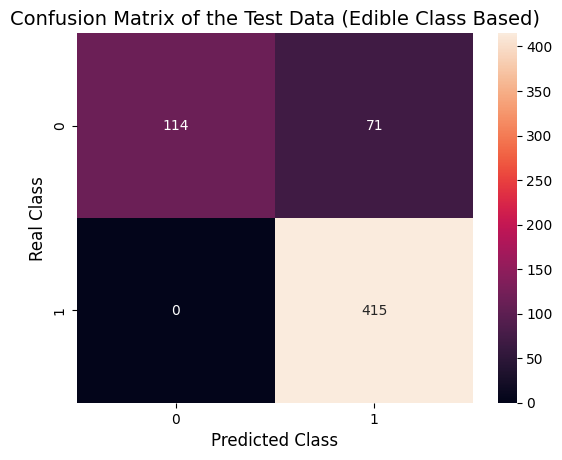

In [ ]:
clf = SVC(C= 15, gamma = 50)
model = clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.title('Confusion Matrix of the Test Data (Edible Class Based)', fontsize=14)
plt.ylabel('Real Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()

In [ ]:
def best_kernel(kernel_name):

  clf = SVC(kernel= kernel_name)
  clf.fit(X_train , y_train)
  y_pred = clf.predict(X_test)
  acc = accuracy_score(y_test, y_pred) * 100
  print("Accuracy =", acc)
  conf_mat = confusion_matrix(y_test, y_pred)
  sns.heatmap(conf_mat, annot=True, fmt='g')
  plt.title('Confusion Matrix of the Test Data (Edible Class Based) for kernel {}'.format(kernel_name), fontsize=14)
  plt.ylabel('Real Class', fontsize=12)
  plt.xlabel('Predicted Class', fontsize=12)
  return

Accuracy = 69.16666666666667


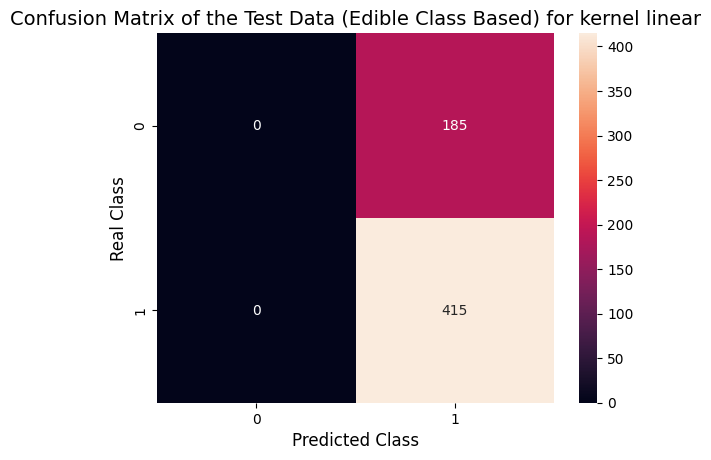

In [ ]:
best_kernel("linear")

Accuracy = 69.16666666666667


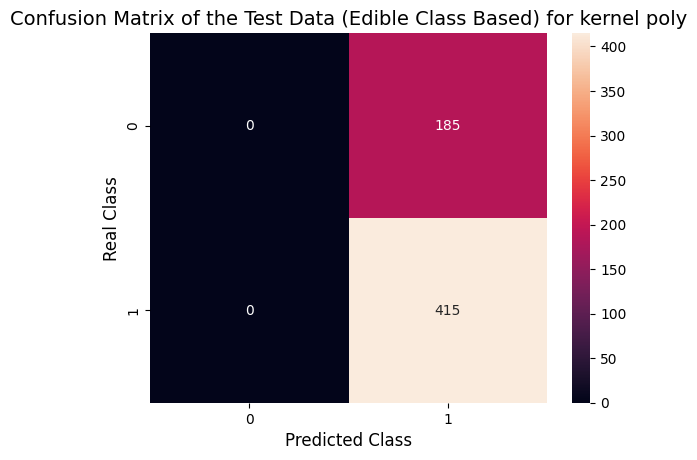

In [ ]:
best_kernel("poly")

Accuracy = 56.99999999999999


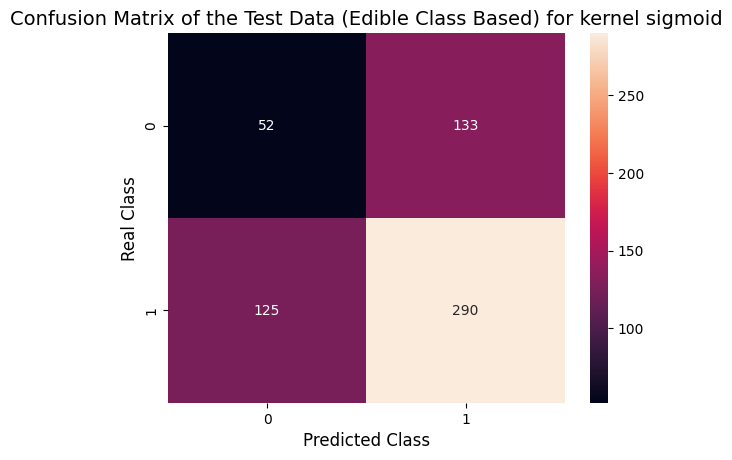

In [ ]:
best_kernel("sigmoid")

### PCA

In [ ]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [62]:
df_mushroom_sc = df_mushroom.drop(columns="class")


In [63]:
X = scale(df_mushroom_sc)
y = df_mushroom["class"]

In [ ]:
X.shape

(2000, 25)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
pca = PCA(n_components= 22)
scaler = StandardScaler()

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
var_ratio = pca.explained_variance_ratio_

var_ratio

array([0.05710619, 0.05266533, 0.05133135, 0.05058547, 0.04818939,
       0.04597162, 0.04492715, 0.04412347, 0.04295806, 0.04190538,
       0.04082514, 0.04044035, 0.03899736, 0.03812443, 0.03739198,
       0.03624856, 0.03518607, 0.035018  , 0.03416963, 0.03245969,
       0.03178833, 0.03152756])

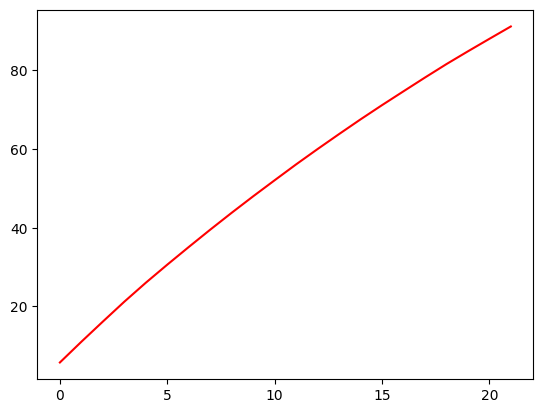

In [67]:
plt.plot(np.cumsum(np.round(var_ratio,decimals = 4)*100),color="red")

Text(0, 0.5, 'Second Principal Component')

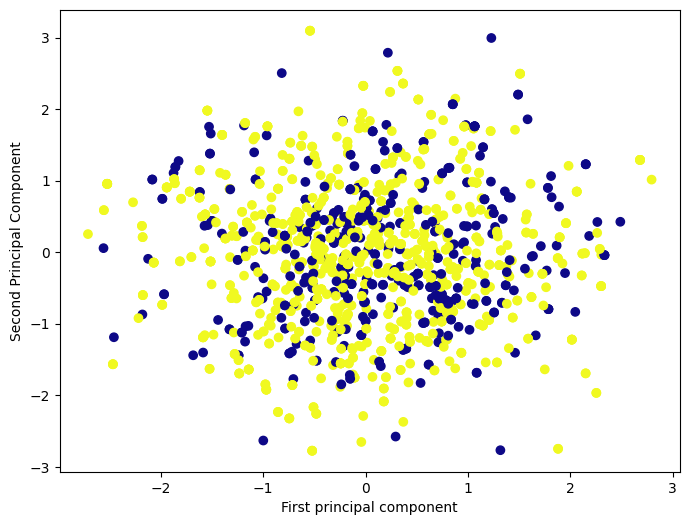

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [74]:
param_grid = {'kernel':["rbf"],'gamma':[50,55,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=10)
grid.fit(X_train, y_train)
best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
conf_mat = confusion_matrix(y_test, y_pred)


Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best params: {'C': 15, 'gamma': 50, 'kernel': 'rbf'}
Accuracy = 88.16666666666667


In [77]:

conf_mat

array([[114,  71],
       [  0, 415]])

With PCA accuracy is same.